In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
dataset=pd.read_csv("appData10.csv")
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dataset["hour"]=dataset["hour"].str.slice(1,3).astype(int)

In [6]:
dataset.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,2,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,3,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [7]:
dataset2=dataset.copy().drop(columns=['user','screen_list' ,'enrolled','enrolled_date','first_open'],axis=1)
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


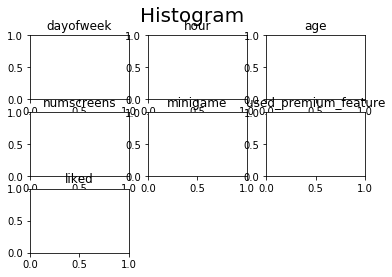

In [8]:
plt.suptitle('Histogram',fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    vals=np.size(dataset2.iloc[:,i-1].unique())

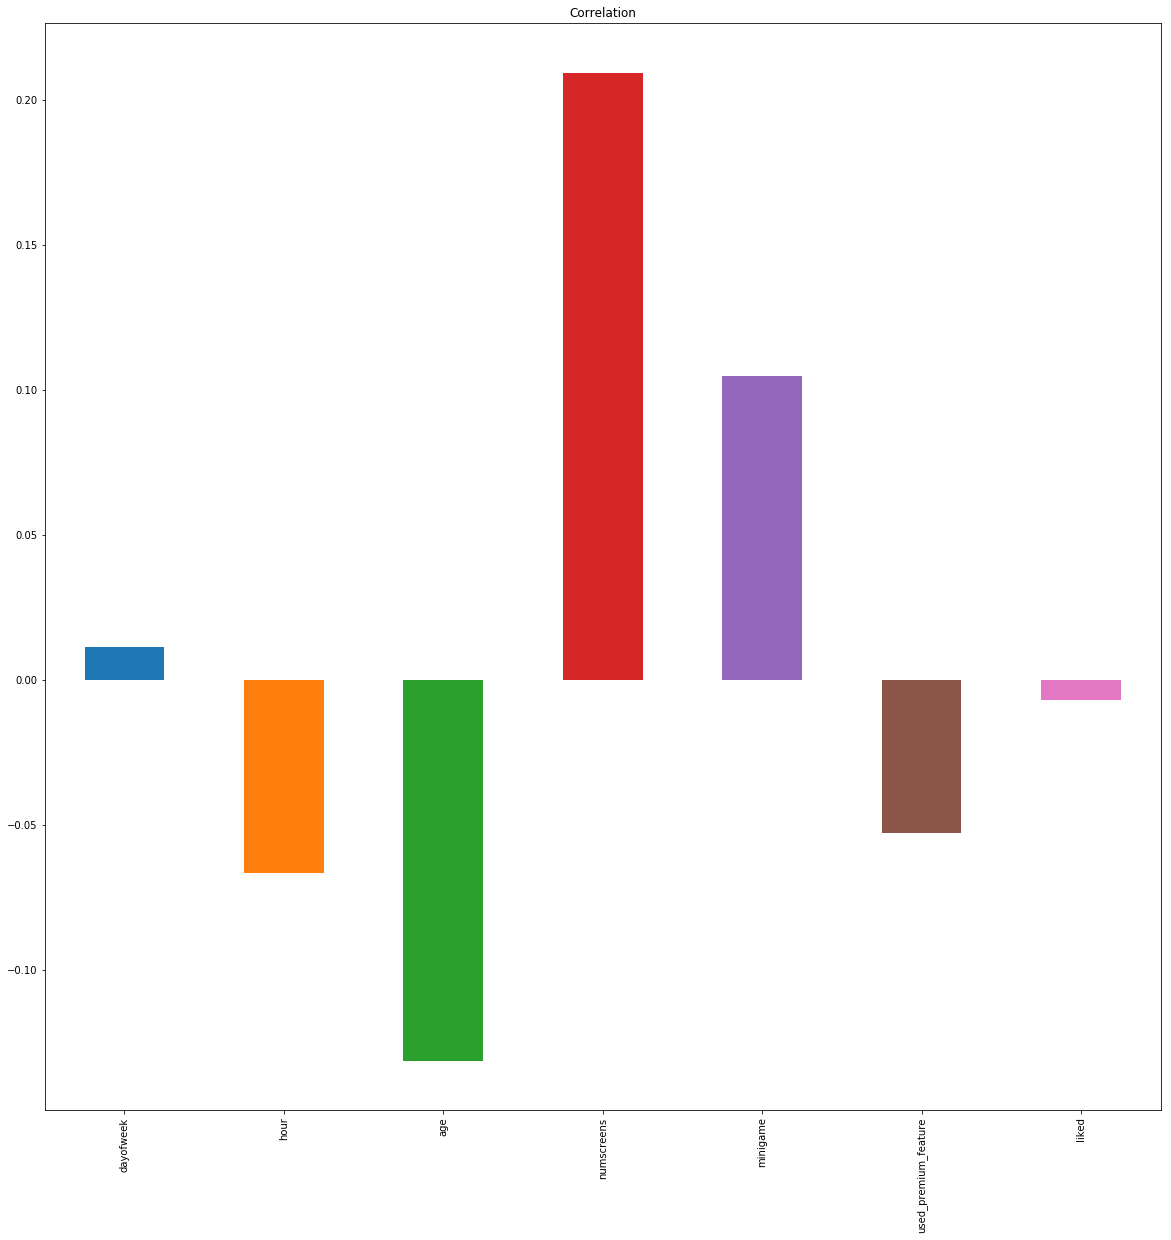

In [9]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,20),title="Correlation")

In [10]:
corr=dataset2.corr()
corr

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,1.000000


In [11]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [12]:
dataset["first_open"]=[parser.parse(row_data) for row_data in dataset["first_open"]]
dataset["first_open"]

0       2012-12-27 02:14:51.273
1       2012-12-02 01:16:00.905
2       2013-03-19 19:19:09.157
3       2013-07-05 16:08:46.354
4       2013-02-26 18:50:48.661
5       2013-04-03 09:58:15.752
6       2012-12-25 02:33:18.461
7       2012-12-11 03:07:49.875
8       2013-03-20 14:22:01.569
9       2013-04-26 18:22:16.013
10      2013-05-14 04:48:27.597
11      2013-05-28 11:07:07.358
12      2012-12-17 06:28:45.903
13      2013-05-25 19:52:31.798
14      2013-02-18 04:48:48.912
15      2013-02-02 18:41:35.724
16      2013-07-07 16:07:35.057
17      2013-02-02 21:12:46.888
18      2013-05-10 05:59:43.405
19      2013-07-06 17:34:46.439
20      2013-05-24 09:19:49.648
21      2013-04-20 04:02:18.337
22      2013-06-08 17:11:46.125
23      2013-05-12 02:17:36.514
24      2013-05-19 20:23:46.939
25      2013-06-23 18:34:40.824
26      2013-06-03 16:36:36.854
27      2013-01-23 01:43:05.398
28      2013-05-14 11:48:41.143
29      2013-04-27 17:41:24.374
                  ...          
49970   

In [14]:
dataset["enrolled_date"]=[parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset["enrolled_date"]]
dataset["enrolled_date"]

0                           NaT
1                           NaT
2                           NaT
3       2013-07-05 16:11:49.513
4       2013-02-26 18:56:37.841
5       2013-04-03 09:59:03.291
6                           NaT
7                           NaT
8       2013-04-27 22:24:54.542
9       2013-04-26 18:31:58.923
10      2013-05-15 21:02:17.200
11                          NaT
12                          NaT
13      2013-06-18 14:27:42.824
14                          NaT
15      2013-04-29 21:10:04.466
16      2013-07-08 16:24:09.052
17      2013-02-11 01:35:03.098
18      2013-05-11 04:29:36.906
19      2013-07-06 18:55:54.215
20      2013-05-26 00:53:03.853
21                          NaT
22      2013-06-08 17:13:13.131
23      2013-05-12 02:20:47.731
24      2013-05-21 12:52:53.166
25      2013-06-23 18:38:29.054
26      2013-06-03 16:43:42.971
27      2013-02-24 01:21:26.698
28      2013-05-14 11:49:25.601
29                          NaT
                  ...          
49970   

In [173]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [174]:
dataset["difference"]=(dataset["enrolled_date"]- dataset["first_open"]).astype("timedelta64[h]")

In [175]:
dataset.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0
5,56480,2013-04-03 09:58:15.752,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0,0.0
6,144649,2012-12-25 02:33:18.461,1,2,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaT,0,NaN
7,249366,2012-12-11 03:07:49.875,1,3,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaT,0,NaN
8,372004,2013-03-20 14:22:01.569,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0,920.0
9,338013,2013-04-26 18:22:16.013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0,0.0


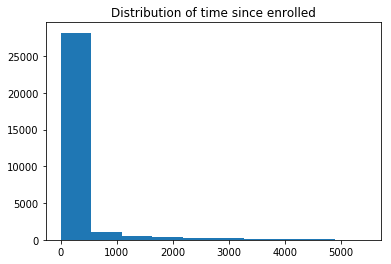

In [176]:
#Conversion to enrolled from free trial

plt.hist(dataset["difference"].dropna())
plt.title("Distribution of time since enrolled")
plt.show()

In [177]:
dataset=dataset.drop(columns=["difference","first_open","enrolled_date","screen_list"],axis=1)

In [178]:
response=dataset["enrolled"]
dataset=dataset.drop(columns="enrolled")

In [213]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset,response,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(40000, 8)
(40000,)
(10000, 8)


18003    0
19959    1
49219    1
35958    1
11055    1
5446     1
36985    1
47167    1
3133     1
33348    0
13142    0
45697    1
21158    0
11471    0
40531    1
25801    0
16028    1
37807    1
698      1
35011    1
31199    0
13986    1
38208    1
25025    1
23437    1
11328    1
10433    1
47012    1
36046    1
46759    1
        ..
17474    1
36213    1
28947    1
32764    1
10071    1
24081    0
46499    1
24020    1
45683    1
12183    0
4566     0
15618    0
18606    1
2432     1
27912    1
22698    0
29368    1
38501    0
18730    0
22531    0
44229    1
9433     1
49780    1
38099    0
15931    1
33423    0
41708    0
30391    0
11720    0
44037    0
Name: enrolled, Length: 10000, dtype: int64

In [180]:
dataset.columns.values

array(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked'], dtype=object)

In [181]:
dataset.index.values

array([    0,     1,     2, ..., 49997, 49998, 49999])

In [194]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)
y_pred=logit.predict(x_test)

/Users/nikhilshetty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


numpy.ndarray

In [183]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.27      0.37      3781
           1       0.67      0.88      0.76      6219

   micro avg       0.65      0.65      0.65     10000
   macro avg       0.62      0.58      0.56     10000
weighted avg       0.63      0.65      0.61     10000



In [191]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1027 2754]
 [ 743 5476]]


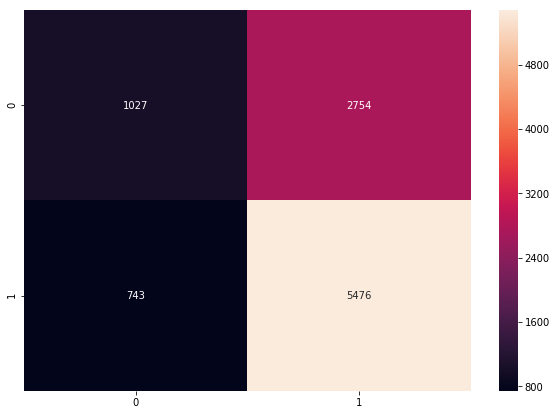

In [193]:
df_cm=pd.DataFrame(cm,index=(0,1),columns=(0,1))
plt.figure(figsize=(10,7))
sns.heatmap(df_cm,annot=True,fmt='g')

In [190]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=logit,X=x_train,y=y_train,cv=5)
print(accuracies.mean())

/Users/nikhilshetty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nikhilshetty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nikhilshetty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.64955


/Users/nikhilshetty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nikhilshetty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [224]:
final_results=pd.DataFrame(columns=["Customer_id","Actual result","Predicted result"])
final_results["Customer_id"]=x_test["user"]
final_results["Actual result"]=y_test
final_results["Predicted result"]=y_pred
#final_results.columns
final_results.head(20).reset_index()

,index,Customer_id,Actual result,Predicted result
0,18003,65813,0,1
1,19959,318627,1,0
2,49219,314488,1,0
3,35958,95239,1,1
4,11055,131332,1,1
5,5446,195454,1,1
6,36985,181860,1,1
7,47167,234146,1,1
8,3133,190872,1,1
9,33348,293496,0,1
